<a href="https://colab.research.google.com/github/lipzy13/PelUang-ML/blob/main/PelUangNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/content/Dataset maps - Dataset.csv')

In [3]:
df = df.drop(['Bencana (1-3)'], axis=1)

In [4]:
print(df)

     LATITUDE   LONGITUDE   ID  Dekat_Sekolah  Dekat_Rumah_Sakit  Dekat_Pasar  \
0   -6.103911  106.939590  2.0              0                  1            0   
1   -6.109130  106.939307  3.0              1                  0            0   
2   -6.110013  106.926087  4.0              1                  1            0   
3   -6.108875  106.929053  5.0              1                  0            0   
4   -6.127213  106.917113  6.0              0                  1            1   
..        ...         ...  ...            ...                ...          ...   
514       NaN         NaN  NaN              0                  0            0   
515       NaN         NaN  NaN              0                  0            0   
516       NaN         NaN  NaN              0                  0            0   
517       NaN         NaN  NaN              0                  0            0   
518       NaN         NaN  NaN              0                  0            0   

     Dekat_Rumah_Warga  Fas

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 446
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LATITUDE                   414 non-null    float64
 1   LONGITUDE                  414 non-null    float64
 2   ID                         414 non-null    float64
 3   Dekat_Sekolah              414 non-null    int64  
 4   Dekat_Rumah_Sakit          414 non-null    int64  
 5   Dekat_Pasar                414 non-null    int64  
 6   Dekat_Rumah_Warga          414 non-null    int64  
 7   Fasilitas_Umum_Masyarakat  414 non-null    int64  
 8   Dilalui_Kendaraan_Umum     414 non-null    int64  
 9   Kepadatan_Jalan            414 non-null    int64  
 10  Dekat_Penginapan_Kost      414 non-null    int64  
 11  Dekat_PT                   414 non-null    int64  
 12  Dekat_Rumah_Ibadah         414 non-null    int64  
 13  Dekat_Stasiun              414 non-null    int64  

In [7]:
df.describe()

,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,Dekat_Penginapan_Kost,Dekat_PT,Dekat_Rumah_Ibadah,Dekat_Stasiun,Dekat_Bandara,Dekat_Terminal
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,-6.196477,106.841895,221.782609,0.584541,0.275362,0.219807,0.731884,0.712560,0.693237,2.169082,0.707729,0.514493,0.603865,0.147343,0.002415,0.026570
std,0.059423,0.052560,134.154012,0.493397,0.447237,0.414617,0.443514,0.453116,0.461708,0.674984,0.455356,0.500395,0.489685,0.354876,0.049147,0.161018
min,-6.344987,106.702650,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.239295,106.809734,105.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.192889,106.849705,211.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,-6.142625,106.879447,346.750000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-6.097723,106.962006,450.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
scaler=StandardScaler()

In [9]:
df[['T_LATITUDE', 'T_LONGITUDE', 'T_Dekat_Sekolah', 'T_Dekat_Rumah_Sakit', 'T_Dekat_Pasar', 'T_Dekat_Rumah_Warga', 'T_Fasilitas_Umum_Masyarakat', 'T_Dilalui_Kendaraan_Umum', 'T_Kepadatan_Jalan', 'T_Dekat_Penginapan_Kost', 'T_Dekat_PT', 'T_Dekat_Rumah_Ibadah', 'T_Dekat_Stasiun', 'T_Dekat_Bandara','T_Dekat_Terminal']] = scaler.fit_transform(df[['LATITUDE', 'LONGITUDE', 'Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal']])

In [10]:
df

,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Dekat_Rumah_Warga,T_Fasilitas_Umum_Masyarakat,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal
0,-6.103911,106.939590,2.0,0,1,0,1,1,1,3,...,0.605257,0.635130,0.665213,1.232508,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213
1,-6.109130,106.939307,3.0,1,0,0,1,1,0,1,...,0.605257,0.635130,-1.503277,-1.734110,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213
2,-6.110013,106.926087,4.0,1,1,0,1,1,1,2,...,0.605257,0.635130,0.665213,-0.250801,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213
3,-6.108875,106.929053,5.0,1,0,0,1,1,1,2,...,0.605257,0.635130,0.665213,-0.250801,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213
4,-6.127213,106.917113,6.0,0,1,1,0,1,1,3,...,-1.652189,0.635130,0.665213,1.232508,-1.556113,-1.029418,-1.234662,-0.415698,-0.049207,-0.165213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,-6.150627,106.778294,446.0,1,0,0,1,1,1,2,...,0.605257,0.635130,0.665213,-0.250801,-1.556113,0.971423,0.809938,-0.415698,-0.049207,6.052798
443,-6.150482,106.781050,447.0,1,0,1,1,1,1,3,...,0.605257,0.635130,0.665213,1.232508,-1.556113,0.971423,0.809938,-0.415698,-0.049207,6.052798
444,-6.178257,106.782487,448.0,1,0,1,1,1,1,3,...,0.605257,0.635130,0.665213,1.232508,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213
445,-6.178203,106.785027,449.0,1,0,1,1,0,1,3,...,0.605257,-1.574481,0.665213,1.232508,0.642627,-1.029418,-1.234662,-0.415698,-0.049207,-0.165213


In [11]:
outli = df[df['ID'] == 142.0].index
df = df.drop(outli)

In [12]:
# Create function to work out optimum number of clusters
def optimise_k_means(data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
      kmeans = KMeans(n_clusters=k)
      kmeans.fit(data)

      means.append(k)
      inertias.append(kmeans. inertia_)

#Generate the elbow plot
  fig = plt.subplots (figsize=(10, 5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

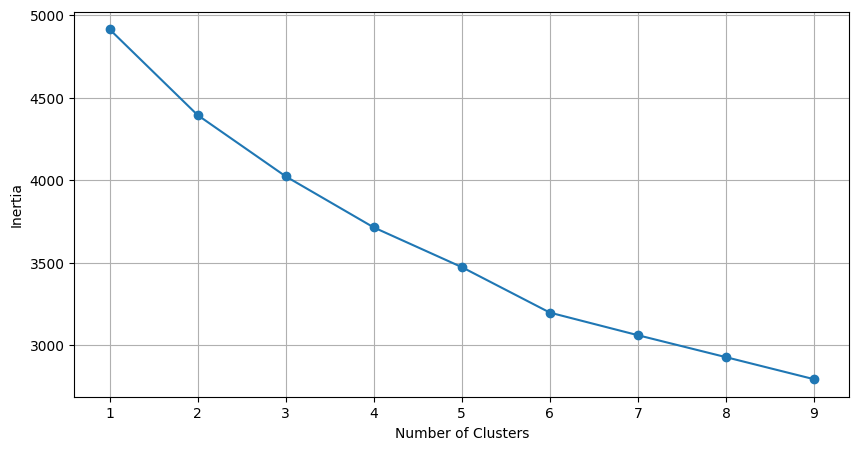

In [13]:
optimise_k_means(df[['T_Dekat_Sekolah', 'T_Dekat_Rumah_Sakit', 'T_Dekat_Pasar', 'T_Dekat_Rumah_Warga', 'T_Fasilitas_Umum_Masyarakat', 'T_Dilalui_Kendaraan_Umum', 'T_Kepadatan_Jalan', 'T_Dekat_Penginapan_Kost', 'T_Dekat_PT', 'T_Dekat_Rumah_Ibadah', 'T_Dekat_Stasiun', 'T_Dekat_Bandara','T_Dekat_Terminal']],10)

In [14]:
kmeans = KMeans(n_clusters=5)

In [15]:
kmeans.fit(df[['T_Dekat_Sekolah', 'T_Dekat_Rumah_Sakit', 'T_Dekat_Pasar', 'T_Dekat_Rumah_Warga', 'T_Fasilitas_Umum_Masyarakat', 'T_Dilalui_Kendaraan_Umum', 'T_Kepadatan_Jalan', 'T_Dekat_Penginapan_Kost', 'T_Dekat_PT', 'T_Dekat_Rumah_Ibadah', 'T_Dekat_Stasiun', 'T_Dekat_Bandara','T_Dekat_Terminal']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [16]:
import pickle

filename = 'model_1.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [17]:
df['kmeans_5'] = kmeans.labels_

In [18]:
df

,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Fasilitas_Umum_Masyarakat,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal,kmeans_5
0,-6.103911,106.939590,2.0,0,1,0,1,1,1,3,...,0.635130,0.665213,1.232508,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213,1
1,-6.109130,106.939307,3.0,1,0,0,1,1,0,1,...,0.635130,-1.503277,-1.734110,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213,4
2,-6.110013,106.926087,4.0,1,1,0,1,1,1,2,...,0.635130,0.665213,-0.250801,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213,1
3,-6.108875,106.929053,5.0,1,0,0,1,1,1,2,...,0.635130,0.665213,-0.250801,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213,2
4,-6.127213,106.917113,6.0,0,1,1,0,1,1,3,...,0.635130,0.665213,1.232508,-1.556113,-1.029418,-1.234662,-0.415698,-0.049207,-0.165213,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,-6.150627,106.778294,446.0,1,0,0,1,1,1,2,...,0.635130,0.665213,-0.250801,-1.556113,0.971423,0.809938,-0.415698,-0.049207,6.052798,0
443,-6.150482,106.781050,447.0,1,0,1,1,1,1,3,...,0.635130,0.665213,1.232508,-1.556113,0.971423,0.809938,-0.415698,-0.049207,6.052798,0
444,-6.178257,106.782487,448.0,1,0,1,1,1,1,3,...,0.635130,0.665213,1.232508,-1.556113,-1.029418,0.809938,-0.415698,-0.049207,-0.165213,2
445,-6.178203,106.785027,449.0,1,0,1,1,0,1,3,...,-1.574481,0.665213,1.232508,0.642627,-1.029418,-1.234662,-0.415698,-0.049207,-0.165213,2


In [19]:
df['kmeans_5'].value_counts()

2    146
4     97
1     92
3     68
0     10
Name: kmeans_5, dtype: int64

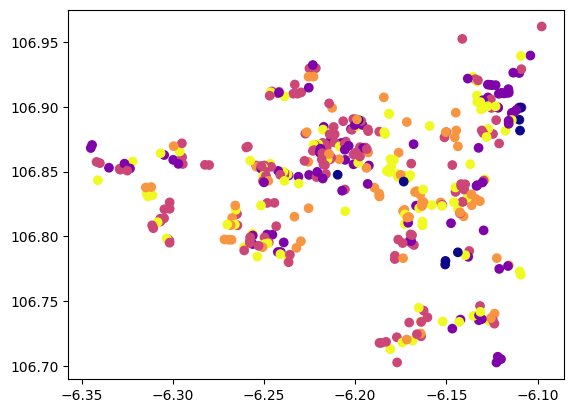

In [20]:
x_ = df['LATITUDE']
y_ = df['LONGITUDE']
label = df['kmeans_5']
plt.scatter(x_, y_, c = label, cmap = 'plasma')

In [21]:
df.to_csv('hasil_clustering.csv', index=False)

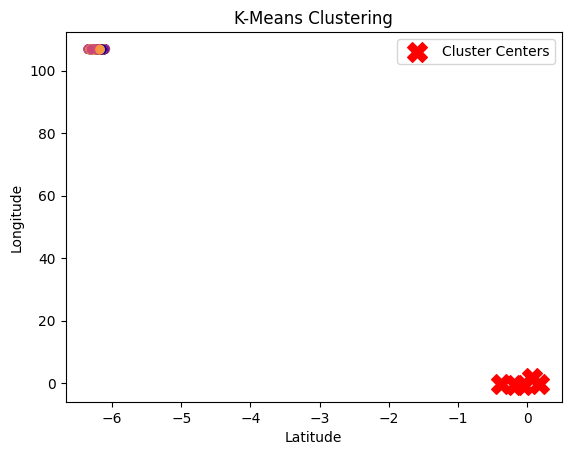

In [22]:
centers = kmeans.cluster_centers_

plt.scatter(x_, y_, c=label, cmap='plasma')
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', label='Cluster Centers')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [23]:
# Fungsi untuk mendapatkan input dari pengguna
def get_user_input():
    print("Masukkan nilai untuk setiap fitur (1 untuk Ya, 0 untuk Tidak), Khusus untuk kepadatan jalan (1 untuk Sepi, 2 untuk Sedang, 3 untuk Ramai):")

    # Pilihan jawaban untuk fitur tertentu
    pilihan_jawaban = lambda pertanyaan: int(input(f"{pertanyaan} (1/0): "))
    pilihan_jawaban_khusus = lambda pertanyaan: int(input(f"{pertanyaan} (1/2/3): "))

    # Misalnya, kita memiliki beberapa fitur dengan pilihan jawaban tertenntu
    nilai_dekat_sekolah = pilihan_jawaban("Dekat Sekolah")
    nilai_dekat_rumah_sakit = pilihan_jawaban("Dekat Rumah Sakit")
    nilai_dekat_pasar = pilihan_jawaban("Dekat Pasar")
    nilai_dekat_rumah_warga = pilihan_jawaban("Dekat Rumah Warga")
    nilai_fasilitas_umum_masyarakat = pilihan_jawaban("Fasilitas Umum Masyarakat")
    nilai_dilalui_kendaraan_umum = pilihan_jawaban("Dilalui Kendaraan Umum")
    nilai_kepadatan_jalan = pilihan_jawaban_khusus("Kepadatan Jalan")
    nilai_dekat_penginapan_kost = pilihan_jawaban("Dekat Penginapan Kost")
    nilai_dekat_pt = pilihan_jawaban("Dekat PT")
    nilai_dekat_rumah_ibadah = pilihan_jawaban("Dekat Rumah Ibadah")
    nilai_dekat_stasiun = pilihan_jawaban("Dekat Stasiun")
    nilai_dekat_bandara = pilihan_jawaban("Dekat Bandara")
    nilai_dekat_terminal = pilihan_jawaban("Dekat Terminal")

    user_data = {
        'Dekat_Sekolah': nilai_dekat_sekolah,
        'Dekat_Rumah_Sakit': nilai_dekat_rumah_sakit,
        'Dekat_Pasar': nilai_dekat_pasar,
        'Dekat_Rumah_Warga': nilai_dekat_rumah_warga,
        'Fasilitas_Umum_Masyarakat': nilai_fasilitas_umum_masyarakat,
        'Dilalui_Kendaraan_Umum': nilai_dilalui_kendaraan_umum,
        'Kepadatan_Jalan': nilai_kepadatan_jalan,
        'Dekat_Penginapan_Kost': nilai_dekat_penginapan_kost,
        'Dekat_PT': nilai_dekat_pt,
        'Dekat_Rumah_Ibadah': nilai_dekat_rumah_ibadah,
        'Dekat_Stasiun': nilai_dekat_stasiun,
        'Dekat_Bandara': nilai_dekat_bandara,
        'Dekat_Terminal': nilai_dekat_terminal
    }

    return user_data

# Melakukan fit scaler ke data pelatihan
scaler = StandardScaler()
scaler.fit(df[['Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal']])

# Mendapatkan input dari pengguna
new_data = get_user_input()

# Skalakan data baru sesuai dengan skala yang sama dengan data pelatihan
new_data_scaled = scaler.transform(np.array(list(new_data.values())).reshape(1, -1))

# Prediksi cluster untuk data baru
predicted_cluster = kmeans.predict(new_data_scaled)

# Menambahkan kolom Predicted_Cluster ke data baru
new_data['Predicted_Cluster'] = predicted_cluster[0]

# Menampilkan hasil prediksi
print("\nHasil Prediksi:")
print(predicted_cluster)
print(new_data)

Masukkan nilai untuk setiap fitur (1 untuk Ya, 0 untuk Tidak), Khusus untuk kepadatan jalan (1 untuk Sepi, 2 untuk Sedang, 3 untuk Ramai):
Dekat Sekolah (1/0): 1
Dekat Rumah Sakit (1/0): 0
Dekat Pasar (1/0): 0
Dekat Rumah Warga (1/0): 1
Fasilitas Umum Masyarakat (1/0): 1
Dilalui Kendaraan Umum (1/0): 1
Kepadatan Jalan (1/2/3): 3
Dekat Penginapan Kost (1/0): 1
Dekat PT (1/0): 0
Dekat Rumah Ibadah (1/0): 1
Dekat Stasiun (1/0): 0
Dekat Bandara (1/0): 0
Dekat Terminal (1/0): 0

Hasil Prediksi:
[2]
{'Dekat_Sekolah': 1, 'Dekat_Rumah_Sakit': 0, 'Dekat_Pasar': 0, 'Dekat_Rumah_Warga': 1, 'Fasilitas_Umum_Masyarakat': 1, 'Dilalui_Kendaraan_Umum': 1, 'Kepadatan_Jalan': 3, 'Dekat_Penginapan_Kost': 1, 'Dekat_PT': 0, 'Dekat_Rumah_Ibadah': 1, 'Dekat_Stasiun': 0, 'Dekat_Bandara': 0, 'Dekat_Terminal': 0, 'Predicted_Cluster': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [24]:
#Fungsi hitung jarak
def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

def find_nearest_points(user_lat, user_lon, dataframe, user_cluster):
    #buat dataset baru
    cluster_df = dataframe[dataframe['kmeans_5'] == user_cluster].copy()
    #masukan data ke kolom distance dengan menghitung jarak
    cluster_df['distance'] = cluster_df.apply(
        lambda row: euclidean_distance(user_lat, user_lon, row['LATITUDE'], row['LONGITUDE']),
        axis=1
    )


    # Urut 5 terdekat
    nearest_points = cluster_df.nsmallest(5, 'distance')
    result_array = nearest_points[['LATITUDE', 'LONGITUDE']].to_numpy()

    return result_array

# Example: Get user input
#user_input_lat = float(input("Enter your latitude: "))
#user_input_lon = float(input("Enter your longitude:"))

input = [-6.228829, 106.847407]
nearest_points = find_nearest_points(input[0], input[1], df, user_cluster=3)

# Display the result
print("Top 5 Nearest Points:")
print(nearest_points)

Top 5 Nearest Points:
[[ -6.22571  106.857502]
 [ -6.217664 106.844659]
 [ -6.247642 106.842828]
 [ -6.214323 106.863593]
 [ -6.20877  106.859567]]


**Analisis Cluster**

**Cluster 0**

In [25]:
cluster_0 = df[df['kmeans_5'] == 0]
cluster_0.loc['total'] = cluster_0.sum()
cluster_0['cluster'] = 0
df_agre = pd.DataFrame(cluster_0.tail(1))
df_agre

<ipython-input-25-9d95f72c344b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0.loc['total'] = cluster_0.sum()
<ipython-input-25-9d95f72c344b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0['cluster'] = 0


,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal,kmeans_5,cluster
total,-61.554745,1068.487882,2468.0,4,2,3,6,10,10,23,...,6.652133,1.941917,-6.76617,1.710864,1.965582,9.949485,-0.492068,60.52798,0,0


**Cluster 1**

In [26]:
cluster_1 = df[df['kmeans_5'] == 1]
cluster_1.loc['total'] = cluster_1.sum()
cluster_1['cluster'] = 1

cluster_1[['LATITUDE', 'LONGITUDE', 'Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal']]
df_agre1 = df_agre.append(cluster_1.tail(1))
df_agre1

<ipython-input-26-6c7985c47690>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1.loc['total'] = cluster_1.sum()
<ipython-input-26-6c7985c47690>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['cluster'] = 1
<ipython-input-26-6c7985c47690>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_agre1 = df_agre.append(cluster_1.tail(1))


,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal,kmeans_5,cluster
total,-61.554745,1068.487882,2468.0,4,2,3,6,10,10,23,...,6.652133,1.941917,-6.766170,1.710864,1.965582,9.949485,-0.492068,60.527980,0,0
total,-568.762073,9830.426498,18961.0,57,92,31,61,81,78,217,...,30.840754,25.875500,-6.840524,-6.669469,23.399314,-29.780307,-4.527024,-15.199582,92,1


**Cluster 2**

In [27]:
cluster_2 = df[df['kmeans_5'] == 2]
cluster_2.loc['total'] = cluster_2.sum()
cluster_2['cluster'] = 2

cluster_2[['LATITUDE', 'LONGITUDE', 'Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal']]
df_agre2 = df_agre1.append(cluster_2.tail(1))
df_agre2

<ipython-input-27-52b601b606df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2.loc['total'] = cluster_2.sum()
<ipython-input-27-52b601b606df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2['cluster'] = 2
<ipython-input-27-52b601b606df>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_agre2 = df_agre1.append(cluster_2.tail(1))


,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal,kmeans_5,cluster
total,-61.554745,1068.487882,2468.0,4,2,3,6,10,10,23,...,6.652133,1.941917,-6.766170,1.710864,1.965582,9.949485,-0.492068,60.527980,0,0
total,-568.762073,9830.426498,18961.0,57,92,31,61,81,78,217,...,30.840754,25.875500,-6.840524,-6.669469,23.399314,-29.780307,-4.527024,-15.199582,92,1
total,-906.918646,15599.083926,37120.0,81,0,26,146,107,146,331,...,97.121139,21.232098,30.060066,-10.236185,-2.380428,-7.087304,-7.184190,-24.121076,292,2


**Cluster 3**

In [28]:
cluster_3 = df[df['kmeans_5'] == 3]
cluster_3.loc['total'] = cluster_3.sum()
cluster_3['cluster'] = 3

cluster_3[['LATITUDE', 'LONGITUDE', 'Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal']]
df_agre3 = df_agre2.append(cluster_3.tail(1))
df_agre3

<ipython-input-28-2589c663f4ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3.loc['total'] = cluster_3.sum()
<ipython-input-28-2589c663f4ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3['cluster'] = 3
<ipython-input-28-2589c663f4ac>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_agre3 = df_agre2.append(cluster_3.tail(1))


,LATITUDE,LONGITUDE,ID,Dekat_Sekolah,Dekat_Rumah_Sakit,Dekat_Pasar,Dekat_Rumah_Warga,Fasilitas_Umum_Masyarakat,Dilalui_Kendaraan_Umum,Kepadatan_Jalan,...,T_Dilalui_Kendaraan_Umum,T_Kepadatan_Jalan,T_Dekat_Penginapan_Kost,T_Dekat_PT,T_Dekat_Rumah_Ibadah,T_Dekat_Stasiun,T_Dekat_Bandara,T_Dekat_Terminal,kmeans_5,cluster
total,-61.554745,1068.487882,2468.0,4,2,3,6,10,10,23,...,6.652133,1.941917,-6.766170,1.710864,1.965582,9.949485,-0.492068,60.527980,0,0
total,-568.762073,9830.426498,18961.0,57,92,31,61,81,78,217,...,30.840754,25.875500,-6.840524,-6.669469,23.399314,-29.780307,-4.527024,-15.199582,92,1
total,-906.918646,15599.083926,37120.0,81,0,26,146,107,146,331,...,97.121139,21.232098,30.060066,-10.236185,-2.380428,-7.087304,-7.184190,-24.121076,292,2
total,-420.963269,7264.572806,13475.0,34,4,11,0,59,52,161,...,10.538655,20.028253,-13.468609,28.040767,-22.619008,36.622281,-3.346061,-11.234474,204,3


**Cluster 4**

In [29]:
cluster_4 = df[df['kmeans_5'] == 4]
cluster_4.loc['total'] = cluster_4.sum()
cluster_4['cluster'] = 4

cluster_4[['LATITUDE', 'LONGITUDE', 'Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal']]
df_agre4 = df_agre3.append(cluster_4.tail(1))
perb_clean =  df_agre4[['LATITUDE', 'LONGITUDE', 'Dekat_Sekolah', 'Dekat_Rumah_Sakit', 'Dekat_Pasar', 'Dekat_Rumah_Warga', 'Fasilitas_Umum_Masyarakat', 'Dilalui_Kendaraan_Umum', 'Kepadatan_Jalan', 'Dekat_Penginapan_Kost', 'Dekat_PT', 'Dekat_Rumah_Ibadah', 'Dekat_Stasiun', 'Dekat_Bandara','Dekat_Terminal', 'cluster']]

<ipython-input-29-ff1c316cdf82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4.loc['total'] = cluster_4.sum()
<ipython-input-29-ff1c316cdf82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4['cluster'] = 4
<ipython-input-29-ff1c316cdf82>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_agre4 = df_agre3.append(cluster_4.tail(1))


In [30]:
perb_clean.to_csv('perbandingan_cluster_clean.csv', index=False)